# 1 - Classification model

Construa um classificador e identifique quais variáveis exercem maior impacto sobre o “target” e informe o porquê interpretando os resultados obtidos. 

métricas: precision, recall e F1-score;

dados: classification_data.zip;


### Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

In [3]:
plt.style.use(["seaborn-notebook"])
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

## Data Inspection

In [4]:
df_train = pd.read_csv("./classification_data/classification_train.csv")
print(f"O dataset tem {df_train.shape[0]} linhas e {df_train.shape[1]} colunas.")
df_train.head()

O dataset tem 670 linhas e 3 colunas.


,x1,x2,target
0,1.934224,-0.111822,1
1,1.767383,-0.976402,1
2,0.937101,-0.085633,1
3,1.340732,0.166960,1
4,-0.199901,-0.155204,1


In [5]:
df_test = pd.read_csv("./classification_data/classification_test.csv")
print(f"O dataset tem {df_test.shape[0]} linhas e {df_test.shape[1]} colunas.")
df_test.head()

O dataset tem 330 linhas e 3 colunas.


,x1,x2,target
0,1.114204,-0.434321,1
1,-1.238490,0.521390,0
2,-0.091781,-0.169471,1
3,0.298820,0.076368,0
4,-0.265779,0.479812,1


In [11]:
split_size = round(df_train.shape[0] / (df_train.shape[0] + df_test.shape[0]) * 100, 2)
print(
    f" O método Holdout realizado previamente entre treino e teste é de \
| {split_size} : {100-split_size} |"
)

 O método Holdout realizado previamente entre treino e teste é de | 67.0 : 33.0 |


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      670 non-null    float64
 1   x2      670 non-null    float64
 2   target  670 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 15.8 KB


In [13]:
df_train.isnull().sum()

x1        0
x2        0
target    0
dtype: int64

In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      330 non-null    float64
 1   x2      330 non-null    float64
 2   target  330 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.9 KB


In [15]:
df_test.isnull().sum()

x1        0
x2        0
target    0
dtype: int64

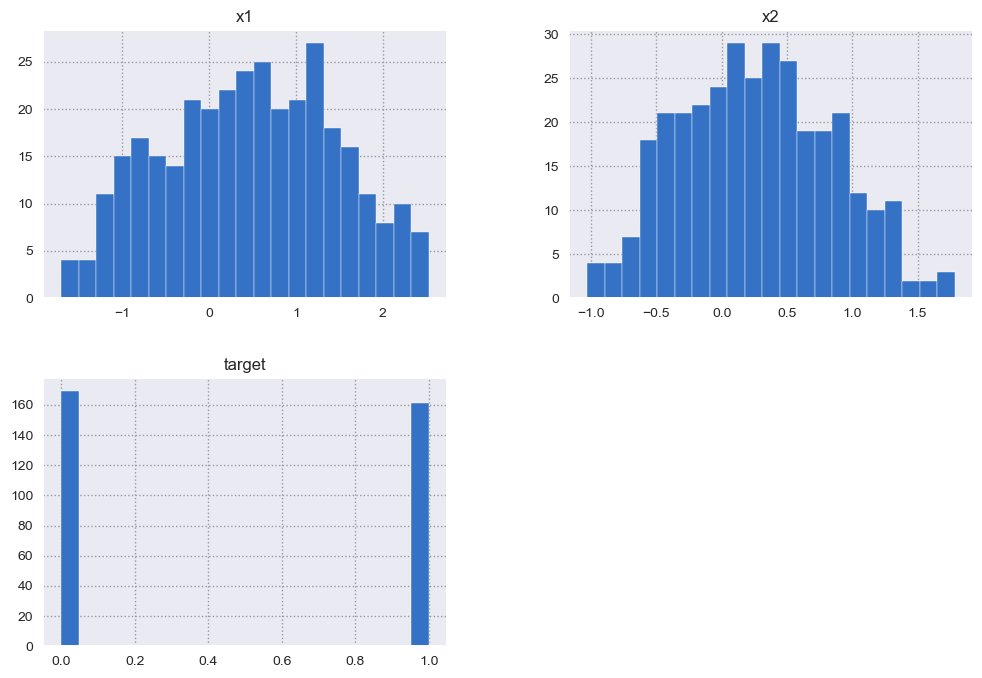

In [16]:
%matplotlib inline
df_test.hist(bins=21, figsize=(12, 8));